In [1]:
import sys
sys.path.append('../scripts') 

import numpy as np
import pandas as pd
import qutip
from qutip_tools import *

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import h5py
import json
import matplotlib 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import sys  
from ast import literal_eval

In [2]:
# define basic figure sizes
bwidth=7
bheight=5
base_font = 20

matplotlib.rcParams.update({'font.size': base_font,"legend.fontsize":base_font-4 ,"font.family": "serif", 
                            "font.serif": "CMU Serif, Times New Roman",
                           'text.usetex' : True })

sns.set_palette("colorblind")

fig_route = "../plots/QPC_double_dot/"

# Exact Diagonalziation

In [46]:

J = 1
N=21
t = 0.1 # dd hopping
Omega = 0.1


# First Order Benchmark

In [41]:

theta = np.pi/2
bond = 10

k = np.arange(1,N)*np.pi/(N+1)
e_k = -2*J*np.cos(k) # QPC energy

Ep0 = e_k + t
Em0 = e_k - t

# First order corrections
Ep1 = (np.cos(theta/2)**2)*(2*np.sin(bond*k)*np.sin(bond*k+k))
Em1 = (np.sin(theta/2)**2)*(2*np.sin(bond*k)*np.sin(bond*k+k))


Text(0, 0.5, '$E$')

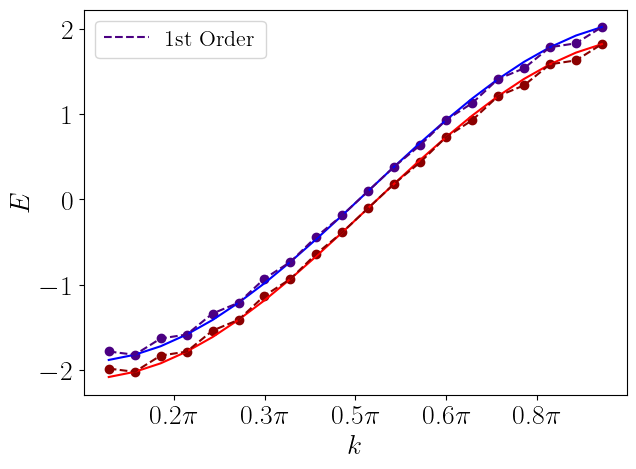

In [42]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

plt.plot(k,Ep0, c = "blue")
plt.plot(k,Em0, c = "red")

# first order corrections
Eplus = Ep0 + Omega*Ep1
Eminus = Em0 + Omega*Em1


plt.scatter(k,Eplus, c = "indigo",)
plt.plot(k,Eplus, c = "indigo", linestyle="dashed", label=r"1st Order" )
plt.scatter(k,Eminus, c = "darkred",)
plt.plot(k,Eminus, c = "darkred",linestyle="dashed")

ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda val,pos: r'{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))

plt.legend()

plt.xlabel(r"$k$")
plt.ylabel(r"$E$")

In [43]:
theta = np.pi + 2*np.pi
np.cos(theta/2)**2

3.374459510989179e-32

In [44]:
b = 14
k = np.pi/(b+1)
np.sin(k*b)*np.sin(k*b+k)

1.177931771603778e-16